<a href="https://colab.research.google.com/github/rupasawant95/Coronavirus-Tweet-Sentiment/blob/main/final_Capstone_Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

#**In this project, We required to do**


1.  WorkFlow
2.  Exploratory Data Analysis
3.  Data Processing
4.  Conclusion



#**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string 
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from nltk.stem.snowball import SnowballStemmer

import warnings
warnings.filterwarnings('ignore')

#**Mount The Drive**

In [2]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read the csv file
df = pd.read_csv('/content/drive/MyDrive/Coronavirus Tweets (1).csv', encoding='latin-1')

In [4]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import nltk
nltk.download('average_perceptron_tagger')

[nltk_data] Error loading average_perceptron_tagger: Package
[nltk_data]     'average_perceptron_tagger' not found in index


False

In [7]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

#**Loading Dataset**

In [8]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [10]:
df['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [11]:
from datetime import datetime

def change_to_timestamp(column):
  return datetime.strptime(column, '%d-%m-%Y')

In [12]:
df['TweetAt'] = df['TweetAt'].apply(change_to_timestamp)

In [13]:
type(df['TweetAt'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df['TweetMonth'] = df['TweetAt'].apply(lambda x : x.month)

In [15]:
count = df.isnull().sum().sort_values(ascending = False)

In [16]:
percentage = ((df.isnull().sum())/len(df)*100).sort_values(ascending=False)

In [17]:
missing_data = pd.concat([count,percentage],axis=1,keys=['Count','Percentage'])
missing_data

,Count,Percentage
Location,8590,20.871298
UserName,0,0.000000
ScreenName,0,0.000000
TweetAt,0,0.000000
OriginalTweet,0,0.000000
Sentiment,0,0.000000
TweetMonth,0,0.000000


In [18]:
df["Location"].fillna(df['Location'].mode().iloc[0],inplace=True)

In [19]:
#Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       41157 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
 6   TweetMonth     41157 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.2+ MB


#**Exploratory Data Analysis**

Text(0.5, 1.0, 'Tweets distributions')

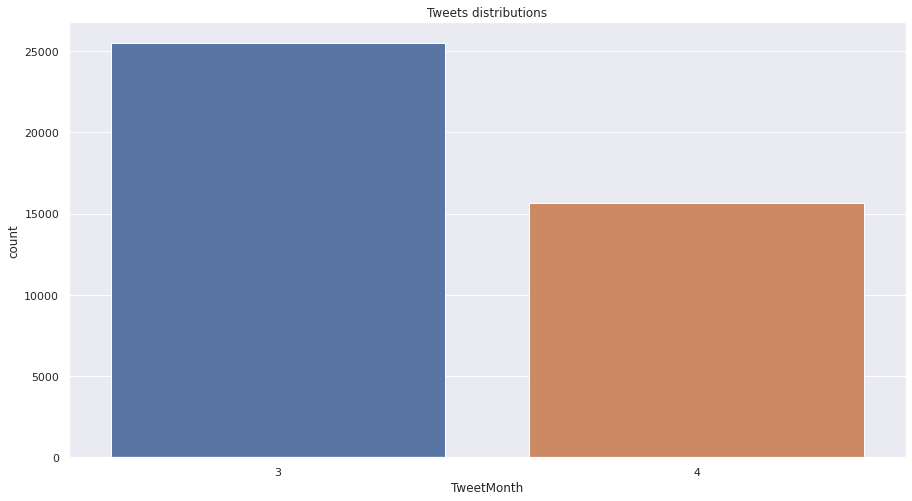

In [20]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df['TweetMonth'])
plt.title('Tweets distributions')

In [21]:
df['TweetAt'].unique()

array(['2020-03-16T00:00:00.000000000', '2020-03-17T00:00:00.000000000',
       '2020-03-18T00:00:00.000000000', '2020-03-19T00:00:00.000000000',
       '2020-03-20T00:00:00.000000000', '2020-03-21T00:00:00.000000000',
       '2020-03-22T00:00:00.000000000', '2020-03-23T00:00:00.000000000',
       '2020-03-24T00:00:00.000000000', '2020-03-25T00:00:00.000000000',
       '2020-03-26T00:00:00.000000000', '2020-03-27T00:00:00.000000000',
       '2020-03-28T00:00:00.000000000', '2020-03-29T00:00:00.000000000',
       '2020-03-30T00:00:00.000000000', '2020-03-31T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000', '2020-04-02T00:00:00.000000000',
       '2020-04-03T00:00:00.000000000', '2020-04-04T00:00:00.000000000',
       '2020-04-05T00:00:00.000000000', '2020-04-06T00:00:00.000000000',
       '2020-04-07T00:00:00.000000000', '2020-04-08T00:00:00.000000000',
       '2020-04-09T00:00:00.000000000', '2020-04-10T00:00:00.000000000',
       '2020-04-11T00:00:00.000000000', '2020-04-12

In [22]:
list_of_month_3 = []
list_of_month_4 = []
for i in range(len(df['TweetAt'])):
  if df['TweetAt'][i].month == 3:
    list_of_month_3.append(df['TweetAt'][i].day)
  if df['TweetAt'][i].month == 4:
    list_of_month_4.append(df['TweetAt'][i].day) 

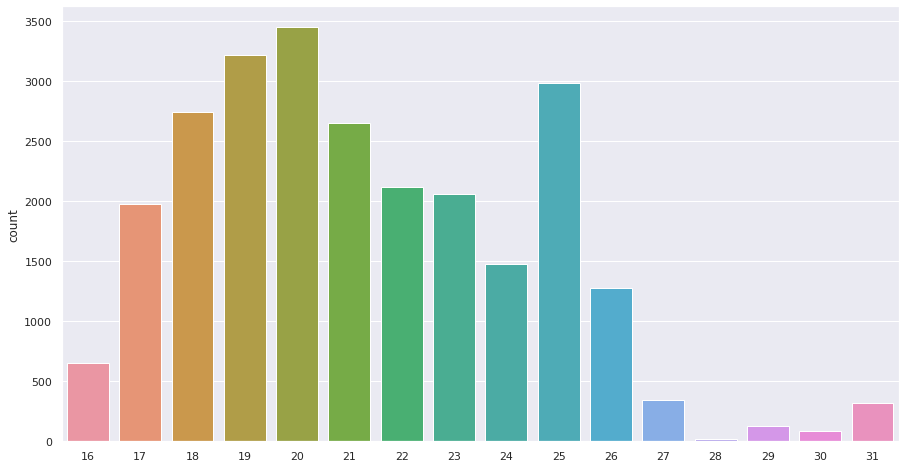

In [23]:
sns.countplot(x=list_of_month_3)

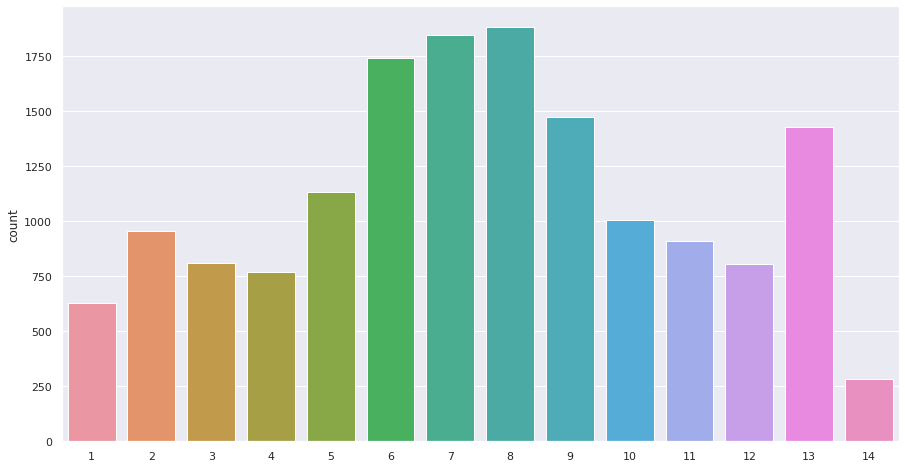

In [24]:
sns.countplot(x=list_of_month_4)

##**Sentiments Countplot**

Text(0.5, 1.0, 'Sentiment distributions')

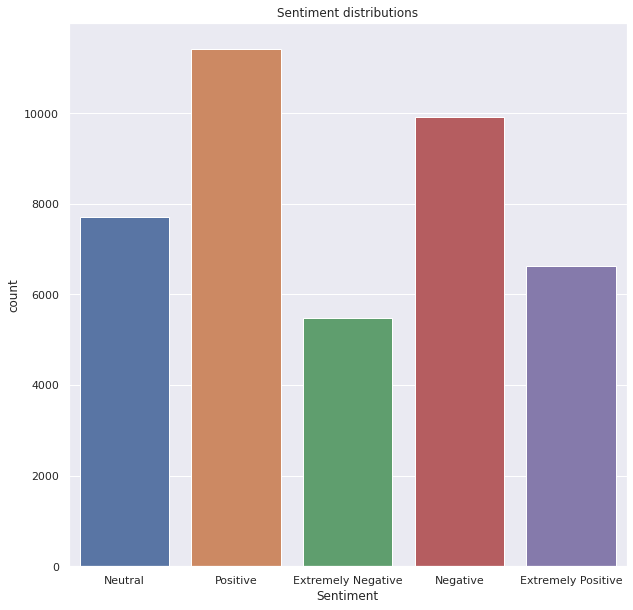

In [25]:
#Ploting the countplot
plt.figure(figsize=(10,10))
sns.countplot(x=df['Sentiment'])
plt.title('Sentiment distributions')

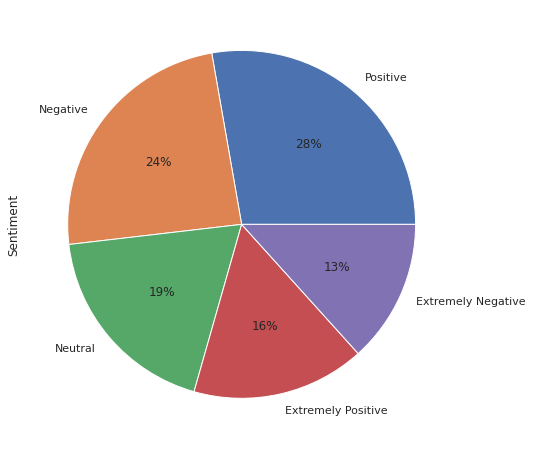

In [26]:
#ploting the piechart
plt.figure(figsize=(8,8))
df.Sentiment.value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

In [27]:
list(df.loc[df["Sentiment"]=='Negative','OriginalTweet'])[0]

"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona"

In [28]:
list(df.loc[df["Sentiment"]=='Positive','OriginalTweet'])[0]

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

In [29]:
list(df.loc[df["Sentiment"]=='Neutral','OriginalTweet'])[0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [30]:
Top_Location_Of_tweet= df['Location'].value_counts().head(10)

In [31]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

,Location,Location_Count
0,London,9130
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


[Text(0, 0, 'London'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'London, England'),
 Text(0, 0, 'New York, NY'),
 Text(0, 0, 'Washington, DC'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Los Angeles, CA'),
 Text(0, 0, 'India'),
 Text(0, 0, 'UK'),
 Text(0, 0, 'Australia')]

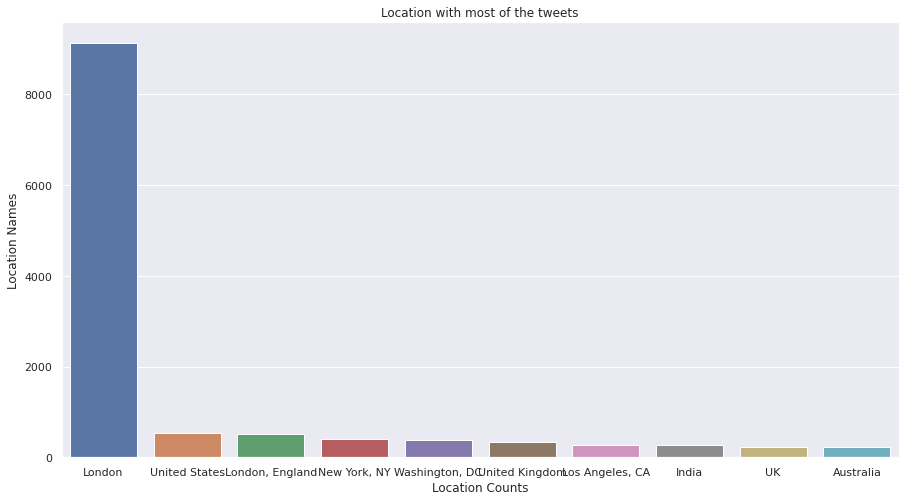

In [32]:
viz_1=sns.barplot(x="Location", y="Location_Count",data=Top_Location_Of_tweet_df)
viz_1.set_title("Location with most of the tweets")
viz_1.set_xlabel("Location Counts")
viz_1.set_ylabel("Location Names")
viz_1.set_xticklabels(viz_1.get_xticklabels())

In [33]:
date_count = df.groupby("TweetAt").count()["OriginalTweet"]
date_count_df = pd.DataFrame(date_count)
date_count_df.sort_values(by=['OriginalTweet'],ascending=False).head(10)

,OriginalTweet
TweetAt,
2020-03-20,3448
2020-03-19,3215
2020-03-25,2979
2020-03-18,2742
2020-03-21,2653
2020-03-22,2114
2020-03-23,2062
2020-03-17,1977
2020-04-08,1881


In [34]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetMonth
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,3
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,London,2020-03-16,My food stock is not the only one which is emp...,Positive,3
4,3803,48755,London,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3


In [35]:
len(list(df['UserName'].unique()))

41157

In [36]:
neg_phrases = df[df.Sentiment == 'Negative']
neg_words = []
for t in neg_phrases.OriginalTweet:
    neg_words.append(t)
neg_words[:4]

["For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona",
 '@10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checkout staff to police the actions of the selfish and profiteer',
 'In preparation for higher demand and a potential food shortage, The Hunger Coalition purchased 10 percent more food and implemented new protocols due to the COVID-19 coronavirus. https://t.co/5CecYtLnYn',
 'Do you see malicious price increases in NYC? The NYC Department of Consumer and Worker Protection (DCWP) has set up a page to digitally file a complaint. Click here: https://t.co/oEx6Y8mm2K\r\r\n\r\r\nTo file a complaint (use the word"Overcharge") https://t.c

In [37]:
neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[:100]

'For corona prevention,we should stop to buy things with the cash and should use online payment metho'

In [38]:
for t in neg_phrases.OriginalTweet[:300]:
    if 'good' in t:
        print(t)
      




#Covid_19 https://t.co/pzirO10avf
People seen stocking up on goods into trolleys after the panic buying rumours spread today at hypermarket in Kajang March 16 2020 Picture by Shafwan Zaidon



yet, Korea's supermarket never out of stock while Malaysia.....empty shelf here and there. The government should totally consider on limiting some necessity goods to every consumer in the market.
@nytopinion @McDonalds @SUBWAY @ChickfilA @CrackerBarrel @Outback @Cheesecake You asked the workers, we asked the restaurants! HereÂs what the top 20 are offering during the outbreak (hint: itÂs not good): https://t.co/e2ZNXajPre

#CoronavirusOutbreak #coronavirus #CoronaVirusUpdates #panicbuying #COVID2019 #COVID19 #COVID?19 #Repost #QuarantineLife #QuarantineAndChill #SocialDistance #StayTheFHome #Corona #wtf https://t.co/yQrUtMwgw9








Thread ?
Seattle to provide $800 in supermarket vouchers to thousands of families during coronavirus crisis, mayor says https://t.co/jupy1W34KK to more than 6,

In [39]:
pos_phrases = df[df.Sentiment == "Positive"] ## 4 is positive sentiment
pos_string = []
for t in pos_phrases.OriginalTweet:
    pos_string.append(t)
pos_text = pd.Series(pos_string).str.cat(sep=' ')
pos_text[:100]

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbe'

#**Word Cloud**

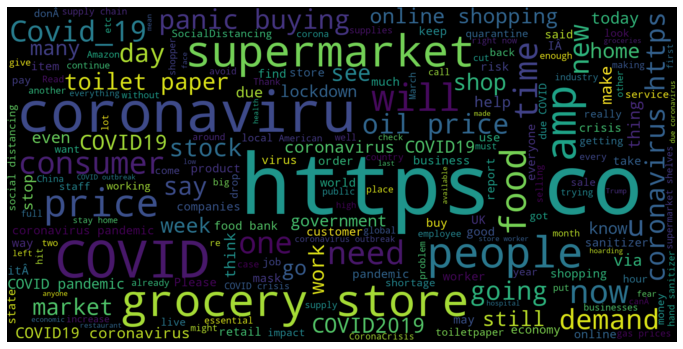

In [40]:
#Create text from all tweets
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

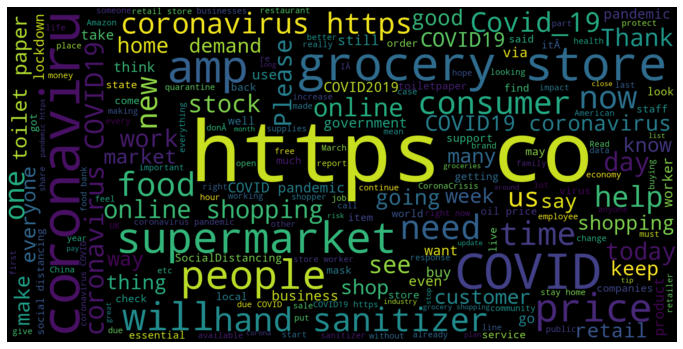

In [41]:
#Create text from normal tweets
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
DF = df.copy()

#**Preprocessing Data**

In [43]:
df.drop(['UserName','ScreenName','Location','TweetAt'],axis=1,inplace=True)
DF.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetMonth
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,3
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,London,2020-03-16,My food stock is not the only one which is emp...,Positive,3
4,3803,48755,London,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3


In [44]:
def preprocessing_text(data):
  data =data.lower()
  data = re.sub(r'http\S+|www\S+|https\S',' ',data,flags=re.MULTILINE)
  data = data.translate(str.maketrans('','',string.punctuation))
  data = re.sub(r'\@\w+|\#'," ", data)
  data_token = word_tokenize(data)
  filtered_words = [word for word in data_token if word not in stop_words]
  ps = PorterStemmer()
  stemmed_words = [ps.stem(w) for w in filtered_words]
  lemmatizer = WordNetLemmatizer()
  lemma_words = [lemmatizer.lemmatize(w,pos='a') for w in stemmed_words]
  return ' '.join(lemma_words)

In [45]:
df['Processed_text'] = df['OriginalTweet'].apply(preprocessing_text)

In [46]:
df.head()

,OriginalTweet,Sentiment,TweetMonth,Processed_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3,menyrbi philgahan chrisitv
1,advice Talk to your neighbours family to excha...,Positive,3,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,Positive,3,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,Positive,3,food stock one empti pleas dont panic enough f...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,readi go supermarket covid19 outbreak im paran...


In [47]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [48]:
encoders_nums = {"Sentiment":{"Neutral": 'Neutral' ,"Positive": 'Positive','Extremely Negative':'Negative','Extremely Positive':'Positive','Negative':'Negative'}}
df = df.replace(encoders_nums)

In [49]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['Processed_text'])
tfidf

<41157x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 459294 stored elements in Compressed Sparse Row format>

#**Dividing Dataset into Training and Test Sets**

In [51]:
x = df.Processed_text
y = df.Sentiment

# splitting data into train and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 225)
print('x_train: ',len(x_train))
print('x_test: ',len(x_test))
print('y_train: ',len(y_train))
print('y_test: ',len(y_test))

x_train:  37041
x_test:  4116
y_train:  37041
y_test:  4116


In [52]:
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = 'lbfgs')

In [53]:
from sklearn.pipeline import Pipeline

In [54]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
predictions = model.predict(x_test)
prediction_train = model.predict(x_train)

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

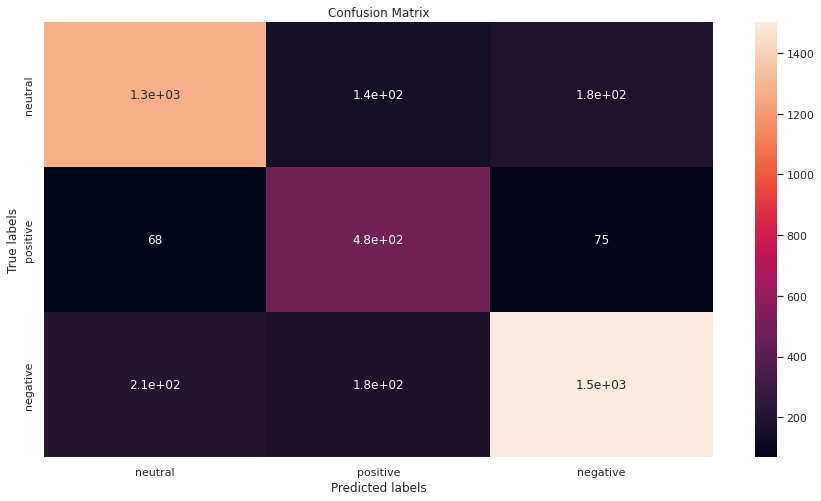

In [57]:
cm_test = confusion_matrix(predictions,y_test)
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells
labels = ['neutral', 'positive','negative']
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

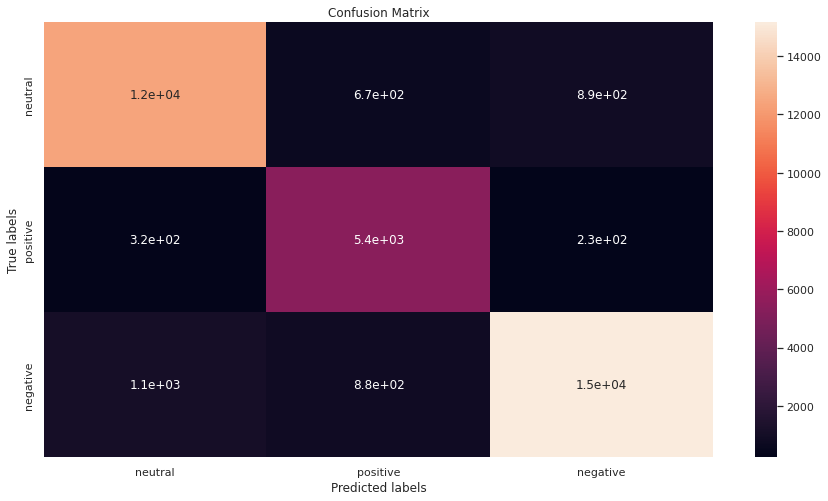

In [58]:
cm_train = confusion_matrix(prediction_train,y_train)
ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [59]:
print('Accuracy score of train set: ',accuracy_score(prediction_train,y_train))
print('Precission of train set: ',precision_score(prediction_train,y_train, average = 'weighted'))
print('Recall of train set: ',recall_score(prediction_train,y_train, average = 'weighted'))

Accuracy score of train set:  0.8908776760886585
Precission of train set:  0.8948535506549515
Recall of train set:  0.8908776760886585


In [60]:
print('Accuracy score of test set: ',accuracy_score(predictions,y_test))
print('Precission of test set: ',precision_score(predictions,y_test, average = 'weighted'))
print('Recall of test set: ',recall_score(predictions,y_test, average = 'weighted'))

Accuracy score of test set:  0.7920310981535471
Precission of test set:  0.802662900884536
Recall of test set:  0.7920310981535471


In [61]:
print('Test set report')
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print('Train set report')
print("\n")
print(classification_report(y_train,prediction_train))

Test set report


              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81      1552
     Neutral       0.77      0.60      0.67       803
    Positive       0.80      0.85      0.82      1761

    accuracy                           0.79      4116
   macro avg       0.79      0.76      0.77      4116
weighted avg       0.79      0.79      0.79      4116



Train set report


              precision    recall  f1-score   support

    Negative       0.89      0.90      0.89     13846
     Neutral       0.91      0.78      0.84      6910
    Positive       0.89      0.93      0.91     16285

    accuracy                           0.89     37041
   macro avg       0.89      0.87      0.88     37041
weighted avg       0.89      0.89      0.89     37041



In [62]:
example = ['Today is a good day']
result = model.predict(example)
print(result)

['Positive']


In [63]:
import pickle
 
filename = 'sentiment_analysis'
pickle.dump(model,open(filename,'wb'))

In [64]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(model, 'model.pkl')

['model.pkl']

In [65]:
list_of_tweets = []
b = []
c = []
for i in range(len(DF['OriginalTweet'])):
  a = DF['OriginalTweet'][i].split(' ')
  for j in a:
    if 'https' in j:
      pass
    else:
      b.append(j) 
  c.append(' '.join(b))
  b = []
for l in c:
  list_of_tweets.append(l) 

# assigning 'OriginalTweet' column to the above list

DF['OriginalTweet'] = list_of_tweets

# downloading stopwords

import nltk
nltk.download('stopwords')

import string
from nltk.corpus import stopwords

# function to remove punctuations and stopwords

def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

# processing the text 

DF['OriginalTweet'] = DF['OriginalTweet'].apply(lambda x : text_process(x))

# changing the values in the data accordingly

for i in range(len(DF['Sentiment'])):
  if DF['Sentiment'][i] == 'Extremely Negative':
    DF['Sentiment'][i] = 'Negative'
  elif DF['Sentiment'][i] == 'Extremely Positive':
    DF['Sentiment'][i] = 'Positive'

# providing necessary class values

''' for negative values = -1
        Positive values = 1   
        neutral values = 0 '''

for i in range(len(df['Sentiment'])):
  if DF['Sentiment'][i] == 'Negative':
    DF['Sentiment'][i] = -1
  elif DF['Sentiment'][i] == 'Positive':
    DF['Sentiment'][i] = 1
  elif DF['Sentiment'][i] == 'Neutral': 
    DF['Sentiment'][i] = 0

# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

# applying stemming function

DF['OriginalTweet'] = DF['OriginalTweet'].apply(stemming)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
DF.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetMonth
0,3799,48751,London,2020-03-16,menyrbi philgahan chrisitv,0,3
1,3800,48752,UK,2020-03-16,advic talk neighbour famili exchang phone numb...,1,3
2,3801,48753,Vagabonds,2020-03-16,coronavirus australia woolworth give elder dis...,1,3
3,3802,48754,London,2020-03-16,food stock one empti pleas dont panic enough f...,1,3
4,3803,48755,London,2020-03-16,readi go supermarket covid19 outbreak im paran...,-1,3


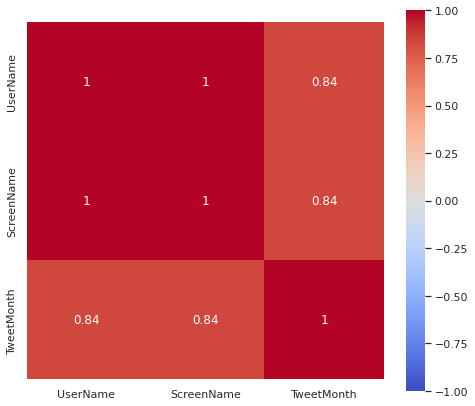

In [67]:
plt.figure(figsize=(8,7))
sns.heatmap(DF.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

#**Training and Testing Model**

In [68]:
vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
X = vectorizer.fit_transform(DF['OriginalTweet'])

# assigning dependent and independent variables

X = X.toarray() 
y = DF['Sentiment']
y=y.astype('int')

In [69]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(DF,test_size = 0.2,random_state=0,stratify = DF.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32925, 7)
valid shape :  (8232, 7)


In [70]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 225)
print('x_train shape: ',x_train.shape)
print('x_test shape: ',x_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (32925, 5121)
x_test shape:  (8232, 5121)
y_train shape:  (32925,)
y_test shape:  (8232,)


##**Logistic Regression**

In [71]:
model = LogisticRegression(multi_class='ovr', solver='lbfgs')
model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [72]:
prediction_test = model.predict(x_test)
prediction_train = model.predict(x_train)

[[10959   519   837]
 [  426  5011   412]
 [  914   624 13223]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

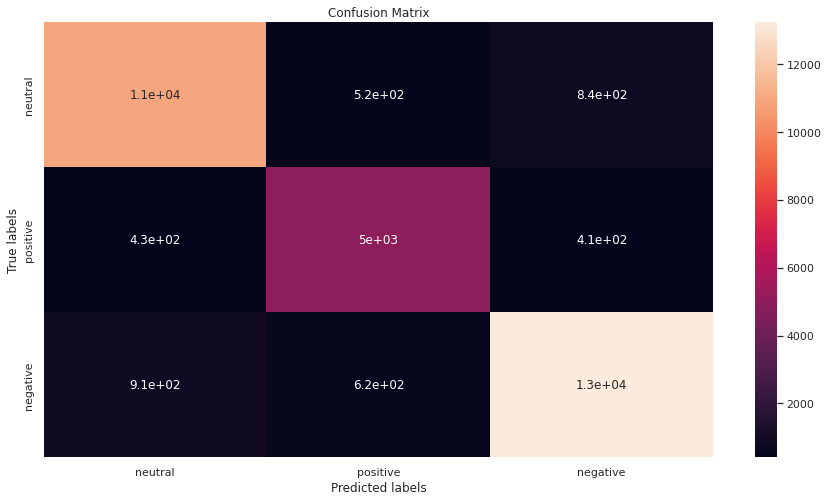

In [73]:
labels = ['neutral', 'positive','negative']
cm_train = confusion_matrix(prediction_train,y_train)
print(cm_train)

ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[2523  229  374]
 [ 222 1075  185]
 [ 354  255 3015]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

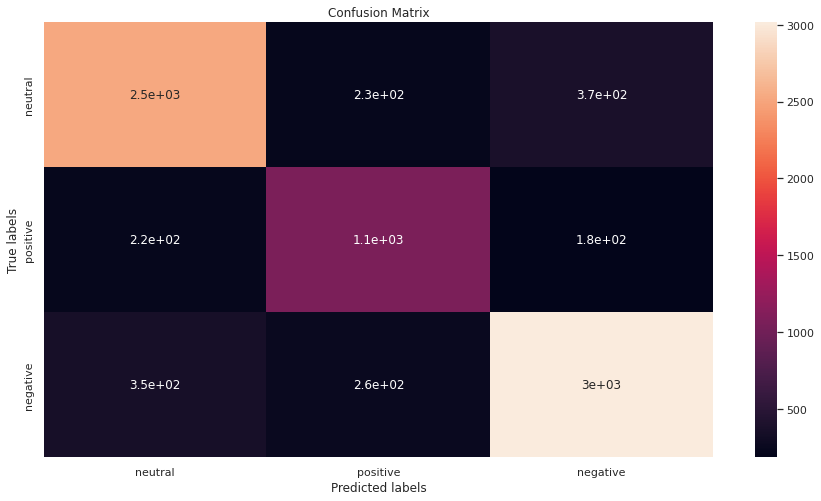

In [74]:
labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(prediction_test,y_test)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [75]:
# getting differant scores of train set

print('Accuracy score of train set: ',accuracy_score(prediction_train,y_train))
print('Precision of train set: ',precision_score(prediction_train,y_train, average = 'weighted'))
print('Recall of train set: ',recall_score(prediction_train,y_train, average = 'weighted'))


Accuracy score of train set:  0.8866514806378132
Precision of train set:  0.8875615266256266
Recall of train set:  0.8866514806378132


In [76]:
print('Accuracy score of test set: ',accuracy_score(prediction_test,y_test))
print('Precision of test set: ',precision_score(prediction_test,y_test, average = 'weighted'))
print('Recall of test set: ',recall_score(prediction_test,y_test, average = 'weighted'))


Accuracy score of test set:  0.8033284742468416
Precision of test set:  0.8046727775737095
Recall of test set:  0.8033284742468416


In [77]:
print('Train set report')
print("\n")
print(classification_report(y_train,prediction_train))
print("\n")
print('Test set report')
print("\n")
print(classification_report(y_test,prediction_test))

Train set report


              precision    recall  f1-score   support

          -1       0.89      0.89      0.89     12299
           0       0.86      0.81      0.83      6154
           1       0.90      0.91      0.90     14472

    accuracy                           0.89     32925
   macro avg       0.88      0.87      0.88     32925
weighted avg       0.89      0.89      0.89     32925



Test set report


              precision    recall  f1-score   support

          -1       0.81      0.81      0.81      3099
           0       0.73      0.69      0.71      1559
           1       0.83      0.84      0.84      3574

    accuracy                           0.80      8232
   macro avg       0.79      0.78      0.79      8232
weighted avg       0.80      0.80      0.80      8232



#**Decision Tree Classifier**

In [78]:
#Traininf and testing decision tree model
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(x_train, y_train)

predictions_test = dtree_model.predict(x_test)
predictions_train = dtree_model.predict(x_train)

[[ 578   19  153]
 [   0    0    0]
 [2521 1540 3421]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

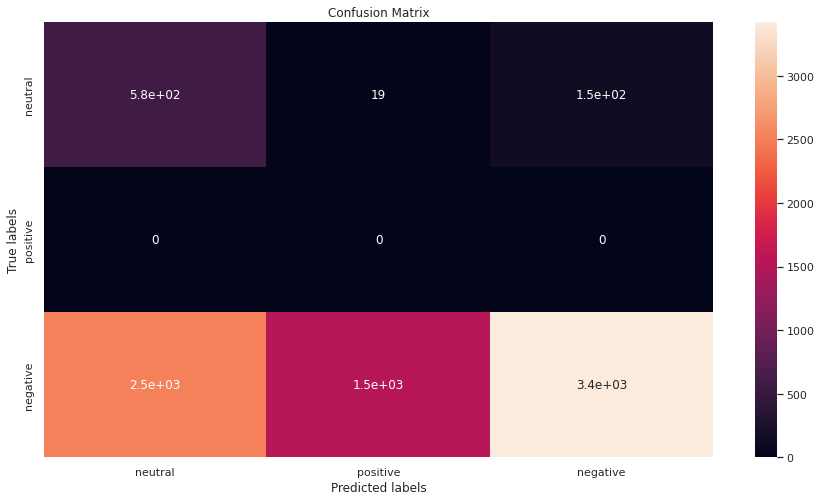

In [79]:
# getting test set confusion matrix

labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(predictions_test,y_test)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[ 2387    97   480]
 [    0     0     0]
 [ 9912  6057 13992]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

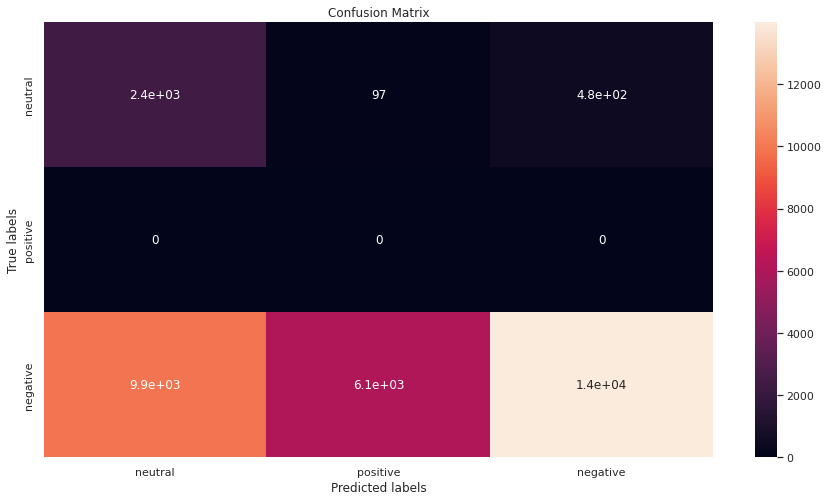

In [80]:
# getting train set confusion matrix

labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(predictions_train,y_train)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [81]:
# Print the classification report for train and test

print('Train set report')
print("\n")
print(classification_report(y_train,predictions_train))
print("\n")
print('Test set report')
print("\n")
print(classification_report(y_test,predictions_test))

Train set report


              precision    recall  f1-score   support

          -1       0.81      0.19      0.31     12299
           0       0.00      0.00      0.00      6154
           1       0.47      0.97      0.63     14472

    accuracy                           0.50     32925
   macro avg       0.42      0.39      0.31     32925
weighted avg       0.51      0.50      0.39     32925



Test set report


              precision    recall  f1-score   support

          -1       0.77      0.19      0.30      3099
           0       0.00      0.00      0.00      1559
           1       0.46      0.96      0.62      3574

    accuracy                           0.49      8232
   macro avg       0.41      0.38      0.31      8232
weighted avg       0.49      0.49      0.38      8232



#**Multinomial Naive Bayes**

In [82]:
# training the model

from sklearn.naive_bayes import MultinomialNB
sentiment_model = MultinomialNB().fit(x_train,y_train)

predictions_test = sentiment_model.predict(x_test)
predictions_train = sentiment_model.predict(x_train)

[[ 9358  1079  2080]
 [ 1042  3762  1220]
 [ 1899  1313 11172]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

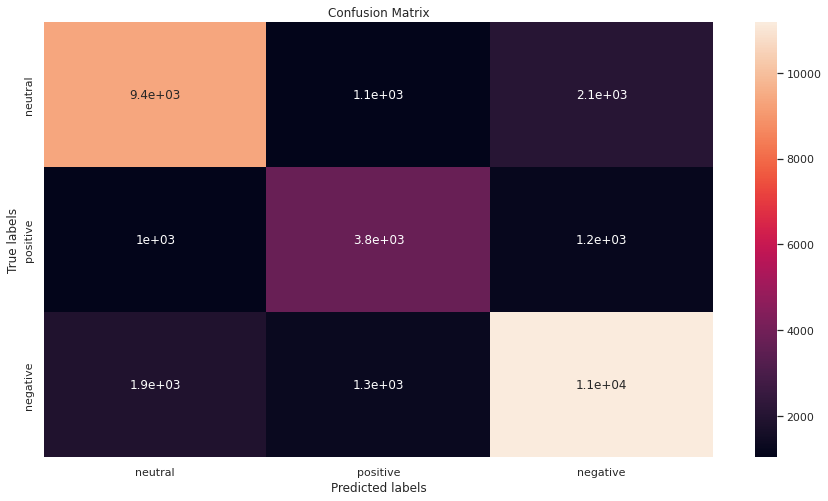

In [83]:
# getting train set confusion matrix

labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(predictions_train,y_train)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[2245  327  622]
 [ 298  810  369]
 [ 556  422 2583]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

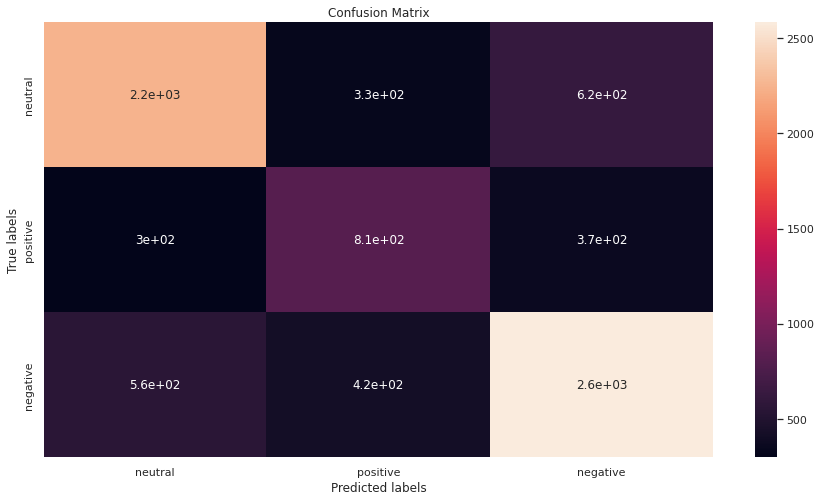

In [84]:
# getting test set confusion matrix

labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(predictions_test,y_test)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [85]:
# Print the classification report for train and test

print('Train set report')
print("\n")
print(classification_report(y_train,predictions_train))
print("\n")
print('Test set report')
print("\n")
print(classification_report(y_test,predictions_test))

Train set report


              precision    recall  f1-score   support

          -1       0.75      0.76      0.75     12299
           0       0.62      0.61      0.62      6154
           1       0.78      0.77      0.77     14472

    accuracy                           0.74     32925
   macro avg       0.72      0.71      0.72     32925
weighted avg       0.74      0.74      0.74     32925



Test set report


              precision    recall  f1-score   support

          -1       0.70      0.72      0.71      3099
           0       0.55      0.52      0.53      1559
           1       0.73      0.72      0.72      3574

    accuracy                           0.68      8232
   macro avg       0.66      0.66      0.66      8232
weighted avg       0.68      0.68      0.68      8232



In [86]:
# Tuning and training the model

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

In [87]:
# vectorizing the data from 'OriginalTweet' column

vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
#X = vectorizer.fit_transform(DF['OriginalTweet'])
X = DF['OriginalTweet']
# assigning dependent and independent variables

#X = X.toarray() 
y = DF['Sentiment']
y=y.astype('int')

In [88]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 225)

In [89]:
# Print the classification report for train and test`

from sklearn.metrics import classification_report
clf = GridSearchCV(text_clf, tuned_parameters, cv=4)
clf.fit(list(x_train), list(y_train))
print('Test set report')
print("\n")
print(classification_report(list(y_test), clf.predict(list(x_test)), digits=2))

Test set report


              precision    recall  f1-score   support

          -1       0.69      0.71      0.70      3099
           0       0.78      0.15      0.25      1559
           1       0.63      0.83      0.72      3574

    accuracy                           0.66      8232
   macro avg       0.70      0.56      0.56      8232
weighted avg       0.68      0.66      0.62      8232



# <b>Conclusion



*   **The given Dataset contain 3 class values : Positive, Negative, Neutral which is a multiclass dataset**
*   **Firstly using EDA on the dataset and later cleaned the data. After that we able to draw relevent conlusion** 

